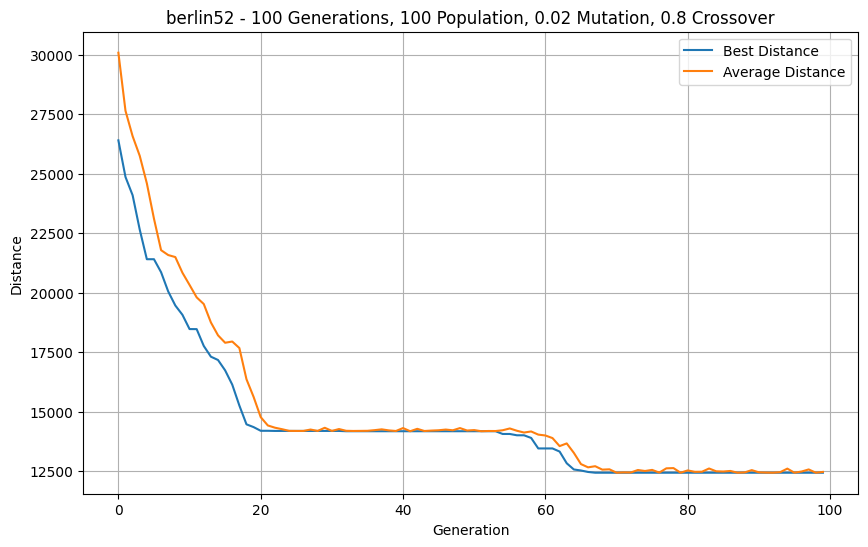

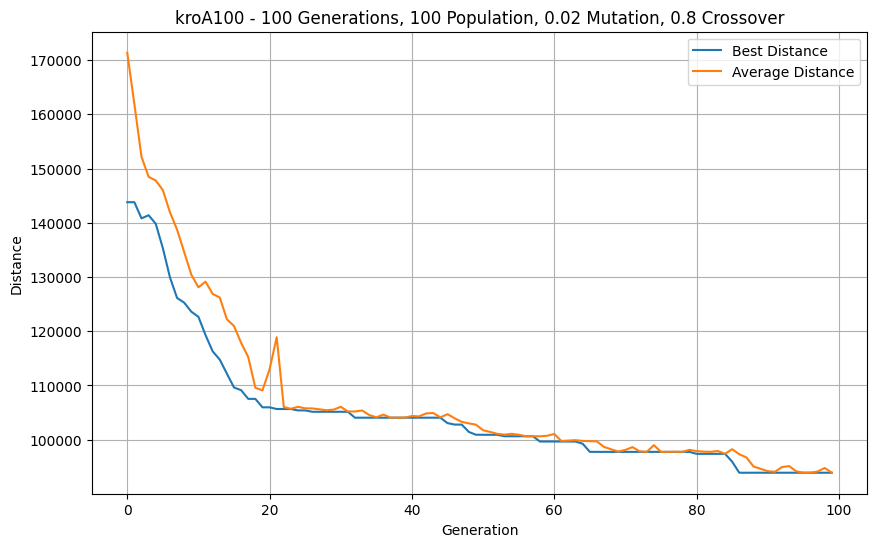

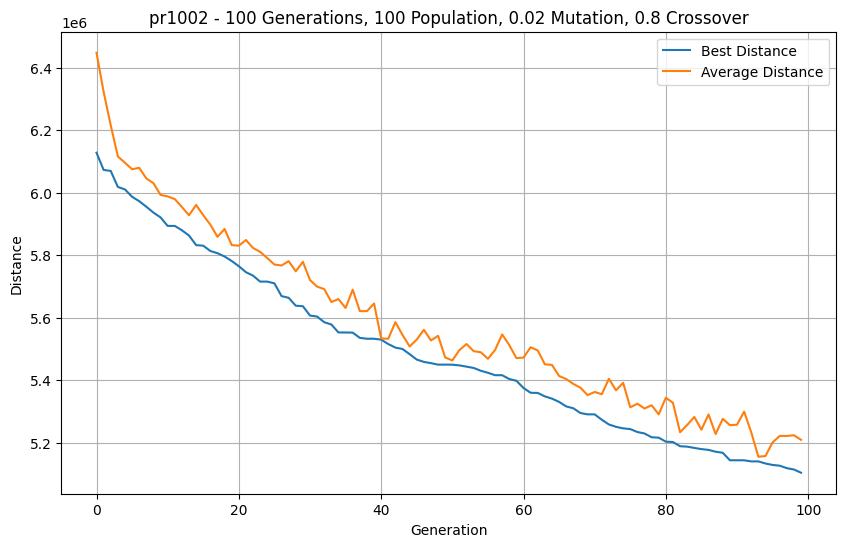

In [7]:
import time
import random
import os

from operators import cycle_crossover, ordered_crossover, swap_mutation, scramble_mutation
from utils import read_tsp_as_dict, init_population, create_distance_matrix, genome_distance, fitnesses, select_parent
from matplotlib import pyplot as plt

def genetic_algorithm(filepath, generations=100, population_size=100, mutation_rate=0.02, crossover_rate=0.8):
    start = time.time() # Start the timer
    city_dict = read_tsp_as_dict(filepath) # Convert the file to a dictionary

    population = init_population(population_size, len(city_dict)) # Initialize a random population

    best_distances = []
    average_distances = []

    distance_matrix = create_distance_matrix(city_dict) # Create the distance matrix

    overall_best_genome = None
    overall_best_distance = float('inf')

    for generation in range(generations):

        pop_distances = [genome_distance(genome, distance_matrix) for genome in population] # Get the distance of each genome

        pop_fitnesses = fitnesses(pop_distances) # Get the fitness of each genome

        new_population = []

        for _ in range(population_size // 2):
            # select two random parents
            parent1 = select_parent(population, pop_fitnesses)
            parent2 = select_parent(population, pop_fitnesses)

            # Crossover
            if random.random() < crossover_rate:
                if random.random() < 0.5:
                    offspring1, offspring2 = cycle_crossover(parent1, parent2)
                else:
                    offspring1, offspring2 = ordered_crossover(parent2, parent1)
            else:
                offspring1, offspring2 = parent1[:], parent2[:]

            if random.random() < mutation_rate:
                if random.random() < 0.5:
                    offspring1 = swap_mutation(offspring1)
                else:
                    offspring1 = scramble_mutation(offspring1)

            # Mutation
            if random.random() < mutation_rate:
                if random.random() < 0.5:
                    offspring2 = swap_mutation(offspring2)
                else:
                    offspring2 = scramble_mutation(offspring2)

            new_population.extend([offspring1, offspring2])

        # Calculate the generation's stats
        best_index = pop_fitnesses.index(population_size)
        best_in_pop = population[best_index]
        best_distance_in_pop = pop_distances[best_index]
        best_distances.append(best_distance_in_pop)
        average_distances.append(sum(pop_distances) / len(pop_distances))

        if best_distance_in_pop < overall_best_distance:
            overall_best_distance = best_distance_in_pop
            overall_best_genome = best_in_pop

        population = new_population

    # End the timer
    end = time.time()
    duration = end - start

    return duration, best_distances, average_distances, overall_best_genome, overall_best_distance


def vary_parameters(filepath, file):
    generations = 100

    pop_sizes = [10,50,100,250,500]
    
    mutation_rates = [0, 0.02, 0.25, 0.5, 1]
    
    crossover_rates = [0, 0.2, 0.4, 0.6, 0.8, 1]

    # Plot varying population sizes
    plt.figure(figsize=(10, 6))
    for pop_size in pop_sizes:
        (duration, best_distances, average_distances,
         overall_best_genome, overall_best_distance) = genetic_algorithm(
                                                        filepath=filepath,
                                                        generations=generations,
                                                        population_size=pop_size,
                                                        mutation_rate=0.02,
                                                        crossover_rate=0.8
                                                    )
        label_name = f"Population Size: {pop_size} - Duration: {duration:.2f}s"
        plt.plot(best_distances, label=label_name)
    
    plt.title(f"{file}: Best Distances for Different Population Sizes")
    plt.xlabel("Generation")
    plt.ylabel("Distance (m)")
    plt.legend()
    plt.show()
        
    # Plot varying mutation rates
    plt.figure(figsize=(10, 6))
    for mutation_rate in mutation_rates:
        (duration, best_distances, average_distances,
         overall_best_genome, overall_best_distance) = genetic_algorithm(
                                                        filepath=filepath,
                                                        generations=generations,
                                                        population_size=100,
                                                        mutation_rate=mutation_rate,
                                                        crossover_rate=0.8
                                                    )
        label_name = f"Mutation rate: {mutation_rate} - Duration: {duration:.2f}s"
        plt.plot(best_distances, label=label_name)
        plt.legend()
    
    plt.title(f"{file}: Best Distances for Different Mutation Rates")
    plt.xlabel("Generation")
    plt.ylabel("Distance (m)")
    plt.legend()
    plt.show()
    
    # Plot varying crossover rates
    plt.figure(figsize=(10, 6))
    for crossover_rate in crossover_rates:
        (duration, best_distances, average_distances,
         overall_best_genome, overall_best_distance) = genetic_algorithm(
                                                        filepath=filepath,
                                                        generations=generations,
                                                        population_size=100,
                                                        mutation_rate=0.02,
                                                        crossover_rate=crossover_rate
                                                    )
        label_name = f"Crossover Rate: {crossover_rate} - Duration: {duration:.2f}s"
        plt.plot(best_distances, label=label_name)
    
    plt.title(f"{file}: Best Distances for Different Crossover Rates")
    plt.xlabel("Generation (m)")
    plt.ylabel("Distance")
    plt.legend()
    plt.show()


def main():
    files = ['berlin52', 'kroA100', 'pr1002']
    for file in files:
        filepath = os.path.join("tsp-files", f"{file}.tsp")
        generations = 100
        population_size = 100
        mutation_rate = 0.02
        crossover_rate = 0.8
        
        # Uncomment if you want to see the affects of varying different parameters in the GA
        # vary_parameters(filepath, file)
        
        # If you to see the average and best distances of each generation with static parameters
        duration, best_distances, average_distances, overall_best_genome, overall_best_distance = genetic_algorithm(filepath, generations, population_size, mutation_rate, crossover_rate)
        
        plt.figure(figsize=(10, 6))
        plt.plot(best_distances, label="Best Distance")
        plt.plot(average_distances, label="Average Distance")
        plt.title(
            f"{file} - {generations} Generations, {population_size} Population, "
            f"{mutation_rate} Mutation, {crossover_rate} Crossover"
        )
        plt.xlabel("Generation")
        plt.ylabel("Distance")
        plt.legend()
        plt.grid(True)
        plt.show()

if __name__ == "__main__":
    main()